# Image Segmentation!

Thanos Car

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.cluster.vq import kmeans, vq
from pylab import plot,show
from sklearn import cluster
#from scimage import quickshift

from scipy.misc import imread

C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


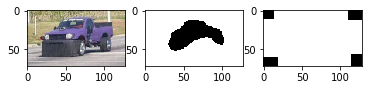

In [2]:
colourImage = imread("thanoscar.png",mode = 'RGB')/255
maskImage = imread("thanosmask.png")/255
backMaskImage = imread("backmask.png")/255
backMaskImage = backMaskImage[:,:,0:3]
maskImage[maskImage != 1] = 0
maskImage3 = maskImage[:,:,0:3]
#print(maskImage3)

threeFigs = plt.figure()
ax = threeFigs.add_subplot(131)
ax.imshow(colourImage, cmap = 'gray')

ax2 = threeFigs.add_subplot(132)
ax2.imshow(maskImage, cmap = 'gray')

ax3 = threeFigs.add_subplot(133)
ax3.imshow(backMaskImage, cmap = 'gray')

([array([ 194., 1038.,  968.,  547.,  820.,  902., 1590., 2500.,  508.,
          149.]),
  array([ 209.,  893., 1172.,  890.,  527., 1059., 2314., 1791.,  239.,
          122.]),
  array([  19.,  357., 1196., 1181., 1613., 1512., 1609., 1457.,  189.,
           83.])],
 array([0.0745098 , 0.16705882, 0.25960784, 0.35215686, 0.44470588,
        0.5372549 , 0.62980392, 0.72235294, 0.81490196, 0.90745098,
        1.        ]),
 <a list of 3 Lists of Patches objects>)

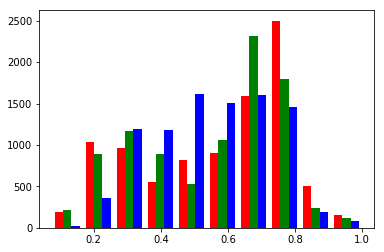

In [3]:
[h,w,D] = colourImage.shape
#AIM Plot 3 histograms, RGB
flatImage = colourImage.flatten()
redImage = flatImage[0::3]
greenImage = flatImage[1::3]
blueImage = flatImage[2::3]
wholeImage = [redImage, greenImage, blueImage]
fig = plt.figure
plt.hist(wholeImage,bins = 10, color = ['red','green','blue'])

## Applying the Mask!

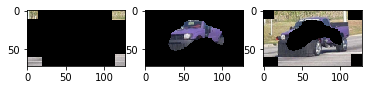

In [4]:
frontMask = colourImage * (np.ones(maskImage3.shape) - maskImage3)
backMask = colourImage * (np.ones(backMaskImage.shape) - backMaskImage)
noMask = colourImage - frontMask - backMask
threeFigs = plt.figure()
ax = threeFigs.add_subplot(131)
ax.imshow(backMask, cmap = 'gray')

ax2 = threeFigs.add_subplot(132)
ax2.imshow(frontMask, cmap = 'gray')

ax3 = threeFigs.add_subplot(133)
ax3.imshow(noMask, cmap = 'gray')

([array([ 15., 213., 431., 302., 382., 249.,   9.,  16.,  16.,   3.]),
  array([ 10., 177., 462., 542., 356.,  35.,  21.,  15.,  15.,   3.]),
  array([  0.,  45., 273., 395., 237., 191., 239., 229.,  23.,   4.])],
 array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
        6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00]),
 <a list of 3 Lists of Patches objects>)

C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


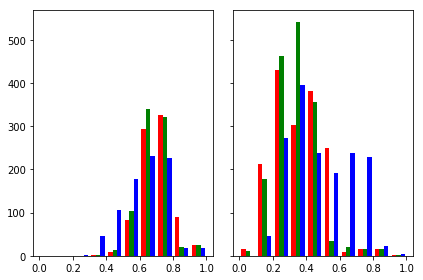

In [5]:
backFlat = backMask.flatten()
frontFlat = frontMask.flatten()
a = backFlat[0::3]
b = backFlat[1::3]
c = backFlat[2::3]
backWhole = [a,b,c]
frontWhole = [frontFlat[0::3],frontFlat[1::3],frontFlat[2::3]]
#backWhole[backWhole == 0] = []
#frontWhole[frontWhole  == 0] = []
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
binpos = np.linspace(0.001,1.001,11)
axs[0].hist(backWhole, bins=binpos , color = ['red','green','blue'])
axs[1].hist(frontWhole, bins=binpos , color = ['red','green','blue'])

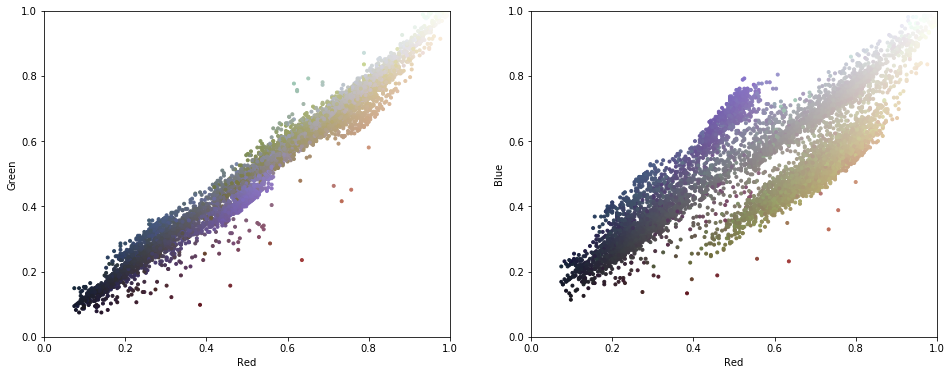

In [6]:
def plot_pixels(data, colors=None, N=100000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

colourNew = colourImage.reshape((h*w,3))   
plot_pixels(colourNew)

In [7]:
kmeans = cluster.KMeans(20)
clusters = kmeans.fit(colourNew)
new_colours = kmeans.cluster_centers_[kmeans.predict(colourNew)]
groups = kmeans.predict(colourNew)
print(groups)

[ 5  8  0 ... 18  5  5]


In [9]:
clusterCols = np.zeros((20,3))
for thing in range(len(groups)):
    N = groups[thing]
    clusterCols[N] = new_colours[thing]

print(clusterCols)

[[0.81736105 0.79541796 0.78280997]
 [0.33047252 0.32783671 0.37553841]
 [0.64691084 0.62464669 0.46258972]
 [0.50853861 0.44141428 0.70568493]
 [0.22687395 0.23082353 0.28144538]
 [0.70694206 0.6870106  0.68626182]
 [0.75928946 0.70817964 0.55987834]
 [0.5461794  0.53292945 0.56065403]
 [0.93031373 0.92566667 0.902     ]
 [0.43821933 0.37875711 0.60191608]
 [0.81118736 0.76246187 0.6280719 ]
 [0.14742739 0.14471473 0.21437417]
 [0.76043028 0.73752723 0.73515795]
 [0.26394285 0.27262502 0.33802706]
 [0.49248082 0.48126172 0.33053708]
 [0.43686275 0.42577031 0.47846339]
 [0.32414566 0.33533769 0.46671646]
 [0.58016993 0.56760784 0.41056209]
 [0.62372598 0.60909136 0.62660573]
 [0.71046027 0.66488514 0.51032238]]


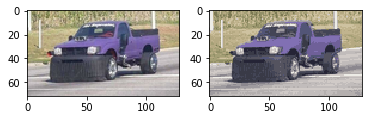

In [8]:
newImage = new_colours.reshape((h,w,3))
#fig = plt.figure
#plt.imshow(newImage)

threeFigs = plt.figure()
ax = threeFigs.add_subplot(121)
ax.imshow(colourImage, cmap = 'gray')

ax2 = threeFigs.add_subplot(122)
ax2.imshow(newImage, cmap = 'gray')

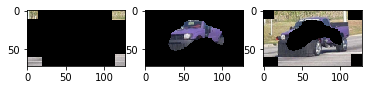

In [10]:
frontMask = colourImage * (np.ones(maskImage3.shape) - maskImage3)
backMask = colourImage * (np.ones(backMaskImage.shape) - backMaskImage)
noMask = colourImage - frontMask - backMask
threeFigs = plt.figure()
ax = threeFigs.add_subplot(131)
ax.imshow(backMask, cmap = 'gray')

ax2 = threeFigs.add_subplot(132)
ax2.imshow(frontMask, cmap = 'gray')

ax3 = threeFigs.add_subplot(133)
ax3.imshow(noMask, cmap = 'gray')

# Number of pixels in each cluster!

In [19]:
fig = plt.figure
groups.sort()
sortgroups =  groups+np.ones(groups.shape)
print(sortgroups)
groupMat = np.zeros((20,w*h))
t = 0
for things in range(len(groups)):
    N = int(sortgroups[things] - 1)
    groupMat[N,t] = sortgroups[things]
    if things <= w*h-2:
        if sortgroups[things] == sortgroups[things+1]:
            t += 1
        else:
            t = 0   
print(groupMat)
bins = np.linspace(1,20,20)


[ 1.  1.  1. ... 20. 20. 20.]
[[ 1.  1.  1. ...  0.  0.  0.]
 [ 2.  2.  2. ...  0.  0.  0.]
 [ 3.  3.  3. ...  0.  0.  0.]
 ...
 [18. 18. 18. ...  0.  0.  0.]
 [19. 19. 19. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]]


In [ ]:
plt.hist(groupMat,bins,colors = clusterCols, stacked = True)

# With Mask Overlay on Cluster Values

In [12]:
gridFrontMask = maskImage[:,:,0]
flatMask = gridFrontMask.flatten()
maskGroups = (groups+np.ones(groups.shape))*flatMask

gridBackMask = backMaskImage[:,:,0]
flatMaskB = gridBackMask.flatten()
maskGroupsB = (groups+np.ones(groups.shape))*flatMaskB

#fig = plt.figure
#plt.hist(maskGroups,np.linspace(1,20,20))

(array([  0.,   0.,   0.,  80., 177., 258., 298., 160.,  99., 139., 128.,
         93., 189.,  15.,   0.,   0.,   0.,   0.,   0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <a list of 19 Patch objects>)

C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


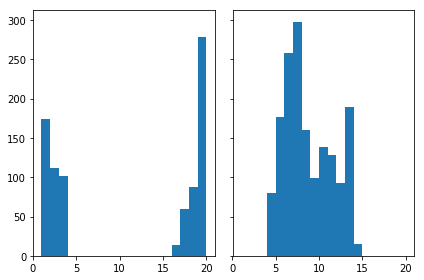

In [13]:
frontMask = np.ones((h,w)) - gridFrontMask
flatMask = frontMask.flatten()
frontGroups = (groups+np.ones(groups.shape))*flatMask

backMask = np.ones((h,w)) - gridBackMask
flatMaskB = backMask.flatten()
backGroups = (groups+np.ones(groups.shape))*flatMaskB

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
binpos = np.linspace(1,20,20)
axs[0].hist(backGroups, bins=binpos)
axs[1].hist(frontGroups, bins=binpos)

In [14]:
GRID = np.zeros((w,h,2))
for i in range(w):
    for j in range(h):
        index = j + h*i
        GRID[i,j,0] = 2*gridMask[j,i] - 1
        GRID[i,j,1] = groups[index]


GRID = GRID.reshape((w*h,2))
#print(GRID)
Ksquared = cluster.KMeans(2)
masks = Ksquared.fit(GRID)

FinalMasks = Ksquared.cluster_centers_[Ksquared.predict(GRID)]
groups2 = Ksquared.predict(GRID)

newMasks = FinalMasks.reshape((h,w,2))
#print(newMasks)

#fig = plt.figure
#plt.imshow(newMasks)

NameError: name 'gridMask' is not defined